# Information networks

You have the basic skills now to construct and interrogate networks. 

Our first subject foray is into what I will term 'information' networks - connections between parcels of information (i.e. human to object or object to object).

Two of the most well studied information networks are Wikipedia and the Web of Science. We will start with Wikipedia first.

# Wikipedia

While we could scrape Wikipedia ourselves, this would take a very long time.

Alternatively, Wikimedia makes an entire [data dump](https://dumps.wikimedia.org) of Wikipedia available. However, it's over 10GB for the entire Wikipedia and we don't have time for that either.

In lieu of these options, we will instead use a dated but complete 2009 network that has already been constructed. There are two main repositories of network data, SNAP and Network Repository. We're going to use the Network Repository version of Wikipedia that is in matrix (`web-wikipedia2009/web-wikipedia2009.mtx`).

So you know how it goes, first step is to figure out how to load it on your own.

In [1]:
#Template
import networkx as nx


And as always, let's get a basic read on the graph.

In [3]:
G.number_of_nodes()

1864439

In [4]:
G.number_of_edges()

4507321

Just giant, there's no way we can try to visualize this. So we'll need to instead look at a summary distribution

In [15]:
#Exercise


Interesting, this is the first time that we've seen this type of degree distribution. It's an extremely famous one, with its first characterization occuring in Science in 1999 (Barabasi and Albert. Emergence of scaling in Random Networks. http://science.sciencemag.org/content/286/5439/509). 

TE 1. Power laws are intriguing for a number of reasons. The first one is that it is **scale-free**. What does that mean?

TE 2. The other interesting aspect is the question, what causes networks to form this way?

Why is scale-free so exciting and was able to generate a decade plus worth of research? Well it has a number of properties that differ in comparison to an Erdos-Renyi (random graph) model. Let's create Power Law (BA) and Random (Erdos Renyi) networks to examine the difference (use 5000 nodes, m=10, p=0.5). 

In [17]:
#Exercise


**Assumption evaluation time** Everything underlying the process model is that the distribution is actually scale free. Which is to say that the degree distribution is $P(k) ~ k^{-\gamma}$

One of the best works re-evaluating how a power law should be fit to a distribution is found in Clauset, Shalizi and Newman (SIAM Review, https://arxiv.org/abs/0706.1062). For convenence, we will use one of the best implementations of this in Python, which is available in the `powerlaw` package. 

What is most important when working with real networks is to carefully evaluate with hypothesis testing if a power-law structure is true. This means comparing it to a number of other heavy-tailed distributions (namely, exponential and log-normal) to make sure that it is true. The finding of a 'scale-free' or 'power-law' distribution for the degree has a number of implications and should not come without careful vetting (and consideration of the data acquisition limits). 

Which is to say, there are a number of papers from ~2000-2010 claiming that a variety of networks are "scale-free". Do not trust this research at face value. 

In [20]:
!pip install powerlaw

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
import powerlaw
results = powerlaw.Fit( list(G.degree().values()) )
print('alpha', results.power_law.alpha)
print('x_min', results.power_law.xmin)

Calculating best minimal value for power law fit
/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


alpha 3.10475877363
x_min 56.0


So this means that you shouldn't start fitting the power law until the degree is at least 56 (this is effectively due to the boundary effect) and that the slope is 3.1. 

But we have yet to test anything

In [22]:
R, p = results.distribution_compare('power_law', 'lognormal')
print(R, p)

-19.4077975464 0.000111135371077


/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Giant grain of salt.

**TE 3.** But theoretical results are one thing, what does this mean about the human interaction? 

# What page/person/item/??? matters most? 

This is one of the most difficult, and important, questions that we generally seek to answer as humans (we love ranking things and that ranking, at some point, becomes knowledge and intuition about a system). In network science, we effectively use a centrality (or similar) measure to determine importance.

As you would expect, there are a number of centrality measures that have been developed and these measures have different implications and uses. 

The first measure is the most simple, *degree centrality*. This is merely taking the degree of every node which we have already done. 

With degree centrality, which node matters the most? 

In [23]:
#Exercise


Unsatisfying, primarily because we have no idea what article `1670463` is and unfortunately the Network Repository doesn't provide a translation (this is an important learning lesson - always gather more data than you think you will need. This network was created to examine the structure of Wikipedia, but not having the page labels dramatically reduces its reuse in other contexts). 

To get around this we will instead load the Wikipedia network from the SNAP repository. This is a much smaller version of Wikipedia because it has been created from humans playing a game (Wikispeedia) where they attempt to navigate through the network.

In [25]:
wikinet = nx.read_edgelist('../data/wikispeedia_paths-and-graph/links.tsv', delimiter='\t')

In [26]:
wikinet.number_of_edges()

106647

In [27]:
wikinet.number_of_nodes()

4592

In [28]:
for i, cc in enumerate(nx.connected_components(wikinet)):
    print( 'Component {0}'.format(i), len(cc) )

Component 0 4589
Component 1 3


This last command was new, what am I showing? Why?

In [29]:
#Your code


In [32]:
max(wikigiant.degree().items(), key=operator.itemgetter(1))

('United_States', 1621)

So the most connected node is the United States - makes you wonder what the prompts were? 

Another popular metric is PageRank, its usage is epitomized by Google Search and works very differently from Degree Centrality. Instead of accounting for the largest number of links, it looks for "expertise" - i.e. where does the most influence flow in the network after we penalize for pages that send lots of "votes".

In [33]:
wiki_pg = nx.pagerank(wikigiant)
for node, pgvalue in sorted(wiki_pg.items(), key=operator.itemgetter(1), reverse=True)[:10]:
    print(node, pgvalue)

United_States 0.0071787064292519655
United_Kingdom 0.004423003732929571
Europe 0.004176626349497665
France 0.003967744864997211
England 0.0036077058311565716
World_War_II 0.0032202300728827247
Germany 0.0031770240479446475
Scientific_classification 0.0029176653225336776
London 0.002768657052200573
Animal 0.0027255850204822947


Typically PageRank and Degree Centrality don't match this well. Let's check the entire Wikipedia graph to see if it's the same case there.

In [34]:
#Exercise


Still matching, let's compare the correlation visually between degree and pagerank here.

In [39]:
#Exercise


And now we can actually see the difference between the two graphs. 

**TE**. Why do you think that the two are so different?

## Path positioning

A different concept to identify importance relies less on degree and more on positioning in a network, it's called *betweenness centrality*. This metric effectively calculates how many shortest paths a node is on between any two other nodes. It's meant to give an idea of how centrally positioned a node is in a network. 

In [41]:
wiki_bc = nx.betweenness_centrality(wikinet)

In [42]:
sorted(wiki_bc.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('United_States', 0.12521613253794953),
 ('United_Kingdom', 0.04738683598690345),
 ('Europe', 0.04465765309097021),
 ('France', 0.036809404595346804),
 ('England', 0.0335970315105526),
 ('World_War_II', 0.025565492076833306),
 ('Germany', 0.023128368642114934),
 ('English_language', 0.020216332534684963),
 ('Africa', 0.019848221106676955),
 ('London', 0.019006225871727952)]

So far it looks like it roughly maps to the degree findings, but let's confirm that with a graph

In [43]:
#Exercise


Overall, these two map relatively well with a clear curvilinear fit. Does this hold in the entire 2009 structure though?

The 2009 network is far too large to calculate betweenness for all nodes since the algorithm scales at $O(VE)$, so approximately $10^{13}$ operations will be needed to calculate betweenness centrality for the network. As a test, on my desktop it takes 12 seconds to calculate betweenness for a network that is 0.000001% the size of the 2009 network ($10^7$ operations). 

Fortunately, we can randomly sample the network and get a good sense of the betweenness for the sampled nodes. This is already built into the networkx function. 

What percentage should we sample?

In [ ]:
#Exercise


(0, 0.005)

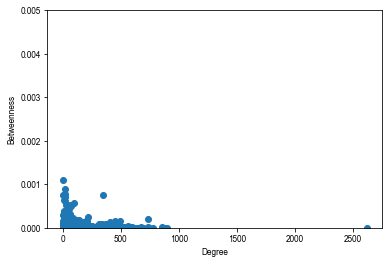

In [50]:
ngkeys = list(gbc.keys())
plt.scatter([gdeg[k] for k in ngkeys], [gbc[k] for k in ngkeys])
plt.ylabel('Betweenness')
plt.xlabel('Degree')
plt.ylim(0, 0.005)

Not even close to reproducing the graph from Wikispeedia. This is because that except in certain configurations (such as a star network), having a large degree does not mean that you are necessarily at the 'center' of the network. This introduces many questions about concept centrality vs the related/connectedness of a concept. 

Now does this change your thoughts about how humans navigate wikipedia under a link constraint? What about the act of creating Wikipedia?

Another way to ask or look at this, is to consider how tightly connected are articles? i.e. If I am writing three articles, A, B, and C, would all three articles reference each other? Or would it be a tree?

The way that we can assess this is with the clustering coefficient. It is a measure of how 'closed' all of a nodes connections are (i.e. do all of your friends know all of your other friends?)

In [5]:
struct_cc = nx.clustering(G.to_undirected())

In [6]:
fig = plt.figure(figsize = (6, 3))
ax = fig.add_subplot(121)
ax.hist(list(struct_cc.values()), bins=100, normed=True, log=True)
ax.set_ylabel('pdf')
ax.set_xlabel('Clustering Coefficient')
#cc vs degree
ax = fig.add_subplot(122)
ax.scatter([gdeg[k] for k in gkeys], [struct_cc[k] for k in gkeys])
ax.set_ylabel('Clustering Coefficient')
ax.set_xlabel('Degree')
plt.tight_layout()

NameError: name 'plt' is not defined

This is a relatively classic clustering coefficient network - as the degree of an item increases the number of closed triangles around it decrease. 

**TE** What would be the interpretation of this?

We can also examine the entire average clustering of the network.

In [8]:
nx.average_clustering(G.to_undirected())

0.1595501380206957

And as a prelude to next week, let's answer a question that directly relates to Wikispeedia. How 'wide' is the network? i.e. What is the average length of a path from one node to another (we're again going to need to sample the network).

How should we go about sampling the network?

In [12]:
compG = list(nx.connected_component_subgraphs(G.to_undirected()))[0]

In [13]:
compG.number_of_nodes()

1864434

In [28]:
import random

sampled_graph = nx.Graph()
sampled_graph.add_edges_from( random.sample(compG.edges(), int( len(compG.edges()) * 0.01 )) )

In [29]:
print('Nodes', sampled_graph.number_of_nodes())
print('Edges', sampled_graph.number_of_edges())

Nodes 80919
Edges 45073


In [30]:
nx.average_shortest_path_length( list(nx.connected_component_subgraphs(sampled_graph))[0] )

1.3333333333333333

In [32]:
for p in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]:
    sampled_graph = nx.Graph()
    sampled_graph.add_edges_from( random.sample(compG.edges(), int( len(compG.edges()) * p )) )
    avg_path = nx.average_shortest_path_length( list(nx.connected_component_subgraphs(sampled_graph))[0] )
    print(p, '%.6f' % avg_path)

0.01 1.0
0.02 1.0
0.03 1.0
0.04 2.380952380952381


KeyboardInterrupt: 

# Amazon

In a different context, let us examine the network of linked Amazon products (when one product suggests the purchase of another product). 

In [67]:
amazon = nx.read_edgelist('../Data/Amazon0302.txt') 
print('Nodes', amazon.number_of_nodes())
print('Edges', amazon.number_of_edges())

Nodes 262111
Edges 899792


What are the basic attributes of this network? What can you glean from it?

Given what we have already done, string together your own analysis to develop some basic insights.

In [68]:
#Exercise


# Metaknowledge

This week we are discussing Evans JA, Foster JG. (2011) Metaknowledge. Science. 331, 6018:721-725. This paper is primarily focused on scientific knowledge, how could it apply to what we have done in class?